In [11]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns                                   # For pretty plot
from datetime import datetime, timedelta

from sklearn import datasets, linear_model
from sklearn.cross_validation import cross_val_predict

from itertools import product

%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 50

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pickle

## Load DataFrame of all irradiance means

In [13]:
irradMean_df = pickle.load(open('../idaWebData/irradMean_df.p', 'rb'))

In [14]:
irradMean_df.head(10)

,time,gre000z0
stn,,
TAE,200001010000,0
TAE,200001010010,0
TAE,200001010020,0
TAE,200001010030,0
TAE,200001010040,12
TAE,200001010050,0
TAE,200001010100,0
TAE,200001010110,0
TAE,200001010120,0


In [15]:
irradMean_df.tail()

,time,gre000z0
stn,,
KLO,201512312310,2
KLO,201512312320,2
KLO,201512312330,2
KLO,201512312340,2
KLO,201512312350,2


In [16]:
irradMean_df.shape

(86541087, 2)

## Pre-processing

Some rows are the headers, remove them

In [17]:
irradMean_df = irradMean_df[irradMean_df.time != 'time']

In [18]:
irradMean_df.shape

(86535644, 2)

Convert time column into datetime

In [20]:
irradMean_df['time'] = pd.to_datetime(irradMean_df['time'], format='%Y%m%d%H%M')

In [21]:
irradMean_df.head()

,time,gre000z0
stn,,
TAE,2000-01-01 00:00:00,0
TAE,2000-01-01 00:10:00,0
TAE,2000-01-01 00:20:00,0
TAE,2000-01-01 00:30:00,0
TAE,2000-01-01 00:40:00,12


Remove missing measurements ("-")

In [22]:
irradMean_df = irradMean_df[irradMean_df.gre000z0 != '-']

In [23]:
irradMean_df.shape

(85954310, 2)

Convert param column into float

In [24]:
irradMean_df.gre000z0 = pd.to_numeric(irradMean_df.gre000z0)

In [25]:
type(irradMean_df.iloc[0]['gre000z0'])

numpy.int64

Remove noise from zero measurements (negative irradiance makes no sense)

In [24]:
irradMean_df.loc[irradMean_df.gre000z0 < 0, 'gre000z0'] = 0

## Grouping

For each station, we want the average for each month (over all years)

Firstly, we transform the time column into month only.

In [26]:
irradMean_df.time = irradMean_df.time.dt.month

In [27]:
irradMean_df.head()

,time,gre000z0
stn,,
TAE,1,0
TAE,1,0
TAE,1,0
TAE,1,0
TAE,1,12


And then we group by station and month

In [28]:
irradMean_df.reset_index(inplace=True)

In [29]:
irradMean_df.head()

,stn,time,gre000z0
0,TAE,1,0
1,TAE,1,0
2,TAE,1,0
3,TAE,1,0
4,TAE,1,12


In [30]:
stn_month_irrad = irradMean_df.groupby(by=['stn','time'])

In [31]:
means = stn_month_irrad.mean()

In [32]:
means

gre000z0
stn    time            
ABO    1      58.048460
       2      96.532893
       3     149.232683
       4     184.433614
       5     202.537315
       6     223.920250
       7     215.322667
       8     190.238898
       9     155.390976
       10    101.868912
       11     61.735498
       12     48.092217
AIG    1      53.937064
       2      91.366564
       3     147.649500
       4     190.951733
       5     214.986601
       6     253.297507
       7     240.113136
       8     206.868041
       9     165.974634
       10    105.705504
       11     61.668927
       12     44.891603
ALT    1      40.979850
       2      78.639340
       3     132.764949
       4     182.079959
       5     204.094546
       6     221.921360
...                 ...
WSLVSF 7     266.251388
       8     227.773566
       9     180.596759
       10    111.264664
       11     41.818263
       12     17.613502
WYN    1      37.802419
       2      76.178236
       3     130.907019
       4     177.085490
       5     212.425709
       6     248.632634
       7     239.195900
       8     203.215712
       9     148.039229
       10     82.179712
       11     43.814406
       12     30.036514
ZER    1      64.380734
       2     109.065261
       3     167.447288
       4     206.381731
       5     229.395342
       6     252.040454
       7     240.252598
       8     210.756666
       9     172.902415
       10    116.972045
       11     67.958769
       12     53.616703

[1711 rows x 1 columns]

In [33]:
type(means)

pandas.core.frame.DataFrame

In [31]:
pickle.dump(means, open('groupedIrradMeans.p', 'wb'))

## Plots

Some plots

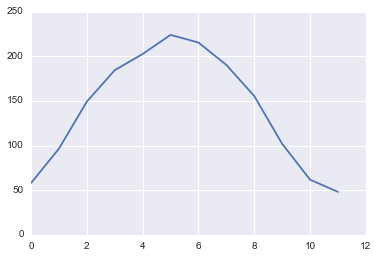

In [34]:
plt.plot(means.loc['ABO']['gre000z0'].values)

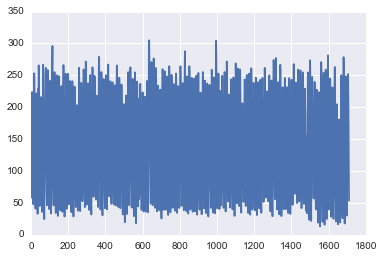

In [35]:
plt.plot(means.gre000z0.values)

## Add power from ELL model

Load trained model

In [36]:
model = pickle.load(open('model.p', 'rb'))

/Users/mohiuddi/anaconda/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator PolynomialFeatures from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/mohiuddi/anaconda/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator Ridge from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/mohiuddi/anaconda/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator Pipeline from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [37]:
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

This model returns power in watts assuming that a total of 14 panels each of 255 Wp are installed. However, power potential of a station is defined as the dc power that can be produced at that station with an installation of 1Wp.

In [38]:
normalizingFactor = 14*255 # in Wp

Predict power for avg irradiation in each month

In [39]:
irradiance_s = means.gre000z0.values

In [40]:
irradiance_s

array([  58.04845955,   96.5328927 ,  149.23268337, ...,  116.9720454 ,
         67.95876906,   53.61670255])

In [41]:
power_s = model.predict(irradiance_s.reshape(-1,1))/normalizingFactor

In [42]:
power_s

array([ 0.05816781,  0.09581515,  0.14708189, ...,  0.11573785,
        0.06787945,  0.0538211 ])

Add power column to DataFrame

In [43]:
means['power'] = power_s

In [44]:
means.head(24)

gre000z0     power
stn time                      
ABO 1      58.048460  0.058168
    2      96.532893  0.095815
    3     149.232683  0.147082
    4     184.433614  0.181141
    5     202.537315  0.198600
    6     223.920250  0.219171
    7     215.322667  0.210906
    8     190.238898  0.186744
    9     155.390976  0.153051
    10    101.868912  0.101021
    11     61.735498  0.061782
    12     48.092217  0.048399
AIG 1      53.937064  0.054135
    2      91.366564  0.090771
    3     147.649500  0.145547
    4     190.951733  0.187431
    5     214.986601  0.210583
    6     253.297507  0.247343
    7     240.113136  0.234712
    8     206.868041  0.202771
    9     165.974634  0.163299
    10    105.705504  0.104762
    11     61.668927  0.061717
    12     44.891603  0.045257

In [61]:
pickle.dump(means, open('groupedStations.p', 'wb'))

## Using the model with Irradiance, Temp and Wind

In [55]:
model2 = pickle.load(open('model_with_temp_wind.p', 'rb'))

In [56]:
normalizingFactor = 14*255 # in Wp

In [57]:
allFeatures_df = pickle.load(open('all_features.p','rb'))

In [58]:
allFeatures_df.head()

Irradiance      Temp      Wind
stn time                                
ABO 1      58.652412  1.335902  6.267113
    2      97.041357  1.268299  5.433493
    3     149.705309  3.154173  6.388994
    4     184.841352  5.838967  6.862268
    5     202.885559  9.307222  7.174839

In [59]:
allFeatures_df.shape

(1573, 3)

In [63]:
X = allFeatures_df.values

In [64]:
power = model2.predict(X)/normalizingFactor

In [65]:
allFeatures_df['power'] = power

In [66]:
allFeatures_df.shape

(1573, 4)

In [80]:
pickle.dump(allFeatures_df, open('groupedStationsAllFeatures.p', 'wb'))

## Conclusion

Now, we can predict that for each of the following years, we have such avg power produced per month and so we can estimate the break-even time

We can use this as our baseline.

## Next

Instead of using an average of monthly values, we could train a model for each month of each station, and then use it for future predictions.